# Image manipulation in Python

Programming in Python

School of Computer Science, University of St Andrews

## Basics of image manipulation
- How the images may be stored in NumPy arrays?
- What else do you need to know to use [scikit-image](https://scikit-image.org/)?

This episode is based on the introduction to the Data Carpentry lesson ["Image processing with Python"](https://datacarpentry.org/image-processing/), which we suggest for further reading

## Which libraries do we need?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# a library to read and write a wide range of image data
import imageio.v3 as iio 
# to enable interactive matplotlib features
%matplotlib widget 

## Working with pixels

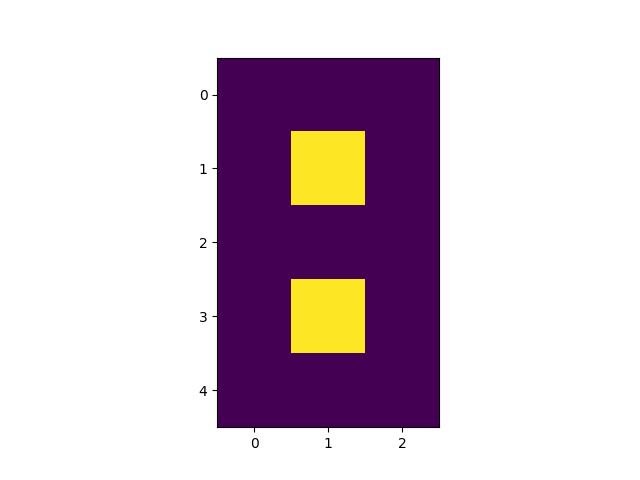

In [2]:
eight = iio.imread(uri="data/eight.tif")
plt.imshow(eight)

## How is it stored?
- it's an array of arrays
- more specifically, NumPy arrays
- it's a 5x3 matrix of 15 pixels

In [3]:
print(eight)
print(type(eight))
print(type(eight[0]))
print(eight.shape)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5, 3)


## We can edit specific pixels

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


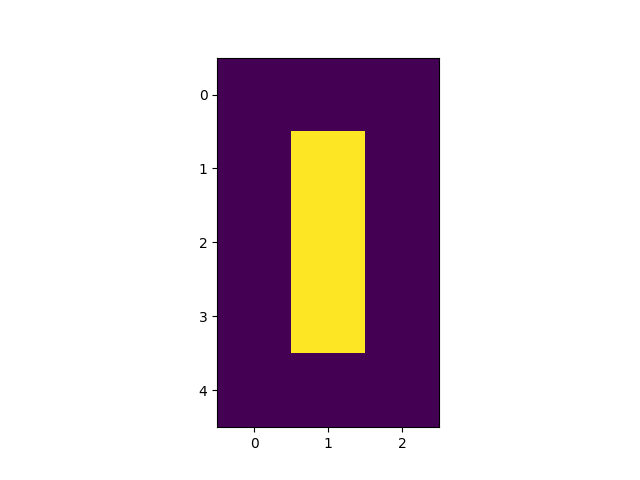

In [4]:
zero = iio.imread(uri="data/eight.tif")
zero[2,1]= 1.0
# Next line creates a new figure for `imshow` to display the output.
# Otherwise, plt.imshow() would overwrite the image in the cell above
fig, ax = plt.subplots()
plt.imshow(zero)
print(zero)

## More colours
- Before, we used only two colours
- Can have more if we use other numbers (or fractions)
- Use numbers from 0 to 255 to have 256 different colours
  (or 256 different levels of grey)
- Why such colours: default colour map (`cmap`) used by this library

[[  0.   0.   0.]
 [  0. 128.   0.]
 [255. 255. 255.]
 [  0. 128.   0.]
 [  0.   0.   0.]]


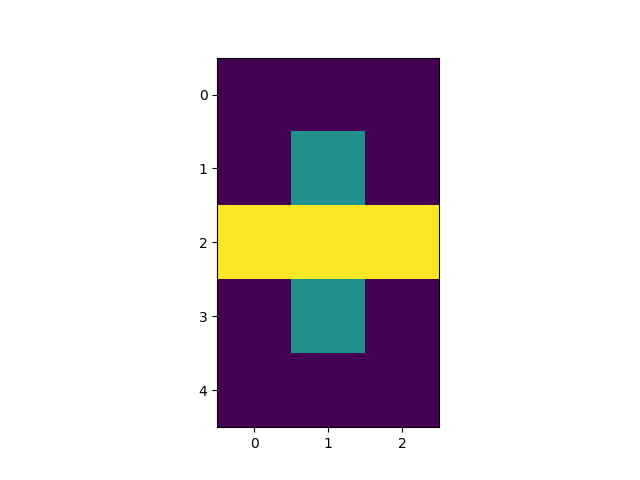

In [5]:
three_colours = iio.imread(uri="data/eight.tif")
three_colours = three_colours * 128
three_colours[2,:] = 255.
fig, ax = plt.subplots()
plt.imshow(three_colours)
print(three_colours)

## Same data in grayscale
- 0: black
- 255: white
- 128: medium grey

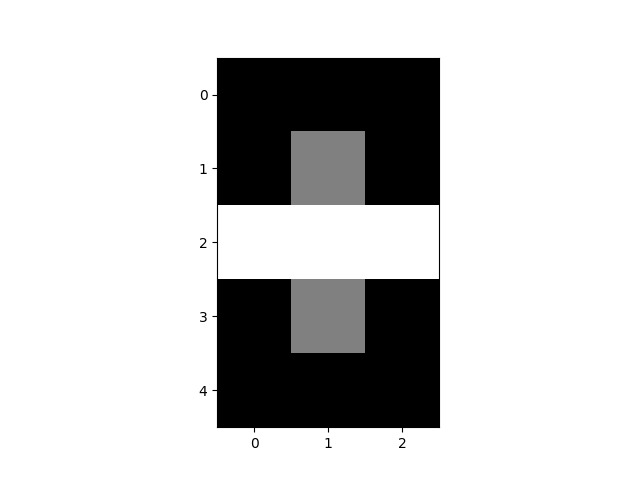

In [6]:
fig, ax = plt.subplots()
plt.imshow(three_colours,cmap=plt.cm.gray)

## Even more colours
- Would be impractical to have a one-to-one mapping between numbers and millions of colours
- Instead, the solution is to store more numbers in more dimensions

In [7]:
# set the random seed so we all get the same matrix
pseudorandomizer = np.random.RandomState(5901)
# create a 5 × 5 grid of random colours
checkerboard = pseudorandomizer.randint(0, 255, size=(5, 5, 3))
checkerboard

array([[[ 20, 147,  59],
        [147,  20, 139],
        [254, 251, 141],
        [ 84, 232,  60],
        [  4, 104, 169]],

       [[ 39,  20, 238],
        [176, 177,  44],
        [111, 218, 123],
        [167, 172, 171],
        [ 72,  28,  35]],

       [[212, 220,  76],
        [141,  56, 218],
        [196, 167,  33],
        [197, 122, 175],
        [170,  76, 143]],

       [[ 73, 153, 161],
        [169, 240, 128],
        [205, 245,  24],
        [ 21, 239, 104],
        [189, 188, 177]],

       [[154,  47,  24],
        [185, 213,  60],
        [  3, 190, 211],
        [118, 249,  68],
        [185,  54, 105]]])

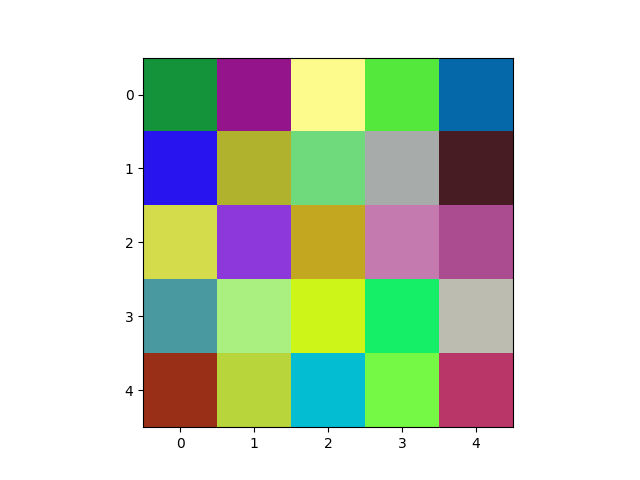

In [8]:
# restore the default map as you show the image
fig, ax = plt.subplots()
plt.imshow(checkerboard)

## Why the blue square is blue?

In [9]:
blue_square = checkerboard[1, 0, :]
blue_square

array([ 39,  20, 238])

## Channels
- Colours mapped to dimensions of the matrix are referred to as channels
- We can extract channels by multiplying the image array representation by a list that has 1 for the channel we want to keep and 0s for the rest

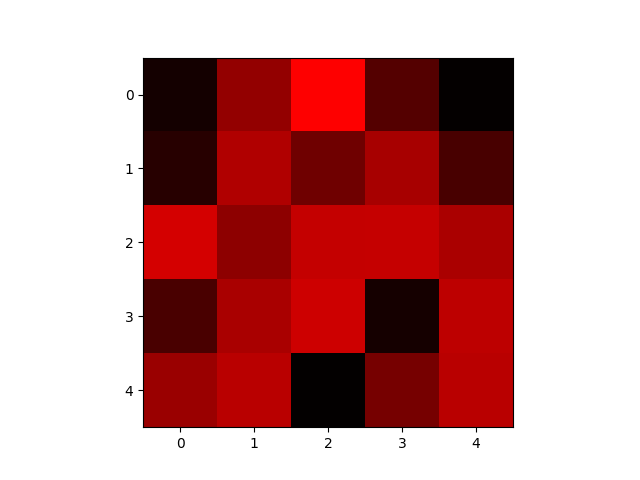

In [10]:
red_channel = checkerboard * [1, 0, 0]
fig, ax = plt.subplots()
plt.imshow(red_channel)

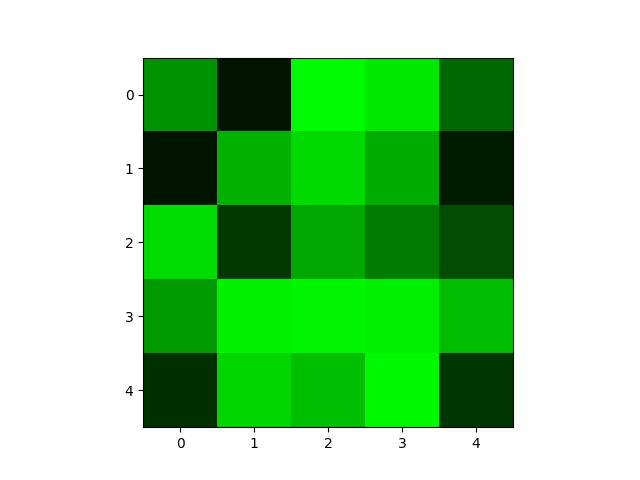

In [11]:
green_channel = checkerboard * [0, 1, 0]
fig, ax = plt.subplots()
plt.imshow(green_channel)

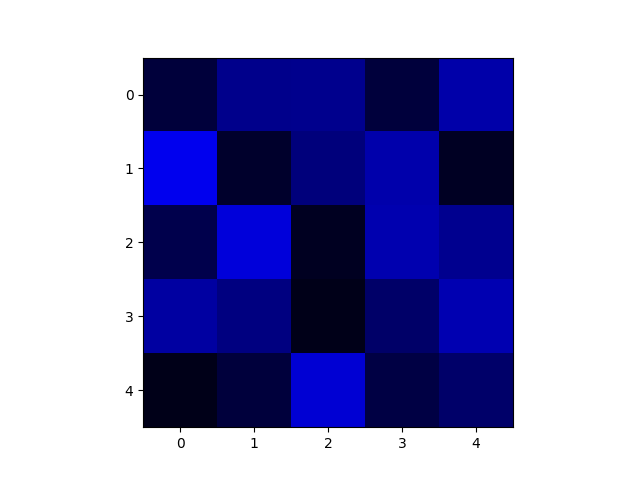

In [12]:
blue_channel = checkerboard * [0, 0, 1]
fig, ax = plt.subplots()
plt.imshow(blue_channel)

## Display the format-specific metadata

In [13]:
metadata = iio.immeta(uri="data/eight.tif")
metadata

{'byteorder': '<',
 'is_tiffep': False,
 'is_shaped': True,
 'shape': [5, 3],
 'is_mdgel': False,
 'is_eer': False,
 'is_mediacy': False,
 'is_ome': False,
 'is_geotiff': False,
 'is_pilatus': False,
 'is_metaseries': False,
 'is_scn': False,
 'is_vista': False,
 'is_svs': False,
 'is_stk': False,
 'is_scanimage': False,
 'is_epics': False,
 'is_qpi': False,
 'is_tvips': False,
 'is_multipage': False,
 'is_fluoview': False,
 'is_imagej': False,
 'is_volumetric': False,
 'is_fei': False,
 'is_philips': False,
 'is_micromanager': False,
 'is_sem': False,
 'is_andor': False,
 'is_nih': False,
 'is_mrc': False,
 'is_sis': False,
 'is_ndpi': False,
 'is_lsm': False,
 'is_bif': False}

## Finally...
- Digital images are represented as rectangular arrays of square pixels
- They use so called `left-hand` coordinate system:
  - the origin in the upper left corner
  - the x-axis going right
  - the y-axis going down
  - like counting down rows and counting columns from left to right
- scikit-image stores images as multi-dimensional NumPy arrays
- scikit-image images specify channels in the RGB order